# UTSA CS 3793: Assignment-4

**Garcia - Jeremiah - (lnm248)**






## Learning Objectives

*   Deep Learning
*   Computer Vision - Convolutional Neural Network
*   Natural Language Processing - Recurrent Neural Network


## General Information

The base structure and comments are provided on what should be done. You are free to use any code from online sources, but please cite the source properly. Also, you are supposed to create/train the DL model and not use pre-trained models.

**TIPS** while working on this assignment:


*   You will have to keep on updating the model to improve accuracy. Hence, all except the first step (loading the data) would be repeated multiple times. i.e. repeat -- model creation, training & testing.
*   Training a Deep Learning model on real-world datasets and obtain decent accuracy is time consuming. For this assignment, it may take at least 40-60 min, if not more, to train the complete data and get around 35% testing accuracy. Hence, have enough time planned out for finishing the assignment.
*   Because of the large training time, it is impossisble to train each student's model. Hence, you will be required to **save the weights** in a file. These weights can then be loaded for testing purposes. More information is provided in a TensorFlow tutorial [here](https://www.tensorflow.org/tutorials/keras/save_and_load).
*   Please refer to the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) for selecting the *'activation function', 'loss', 'optimizer' & 'metrics'*. At least use 'accuracy' as one of the 'metrics'.




##Import Libraries

Write all the import statements here.

In [6]:
# importing all required libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import random
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Computer Vision - CNN

The goal of this task is to get hands-on experience in developing, training and testing **Convolutional Neural Network** for the Computer Vision task of Object/Image Classification.

## Load/Prepare Data

(20 points)

In this assignment, will work with the well-known **CIFAR-100 dataset**. The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In this section, you will write code for the following:

*   Load the CIFAR-100 dataset
*   Prepare the data to be used for the DL model creation and training
*   Visualize the data by plotting 100 random images, one each for the 100 classes



In [7]:
# Load the data - training as well as testing
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

# Prepare the data that can be used by the next step - creating and training the DL model
# Normalize the pixel values of the images to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']



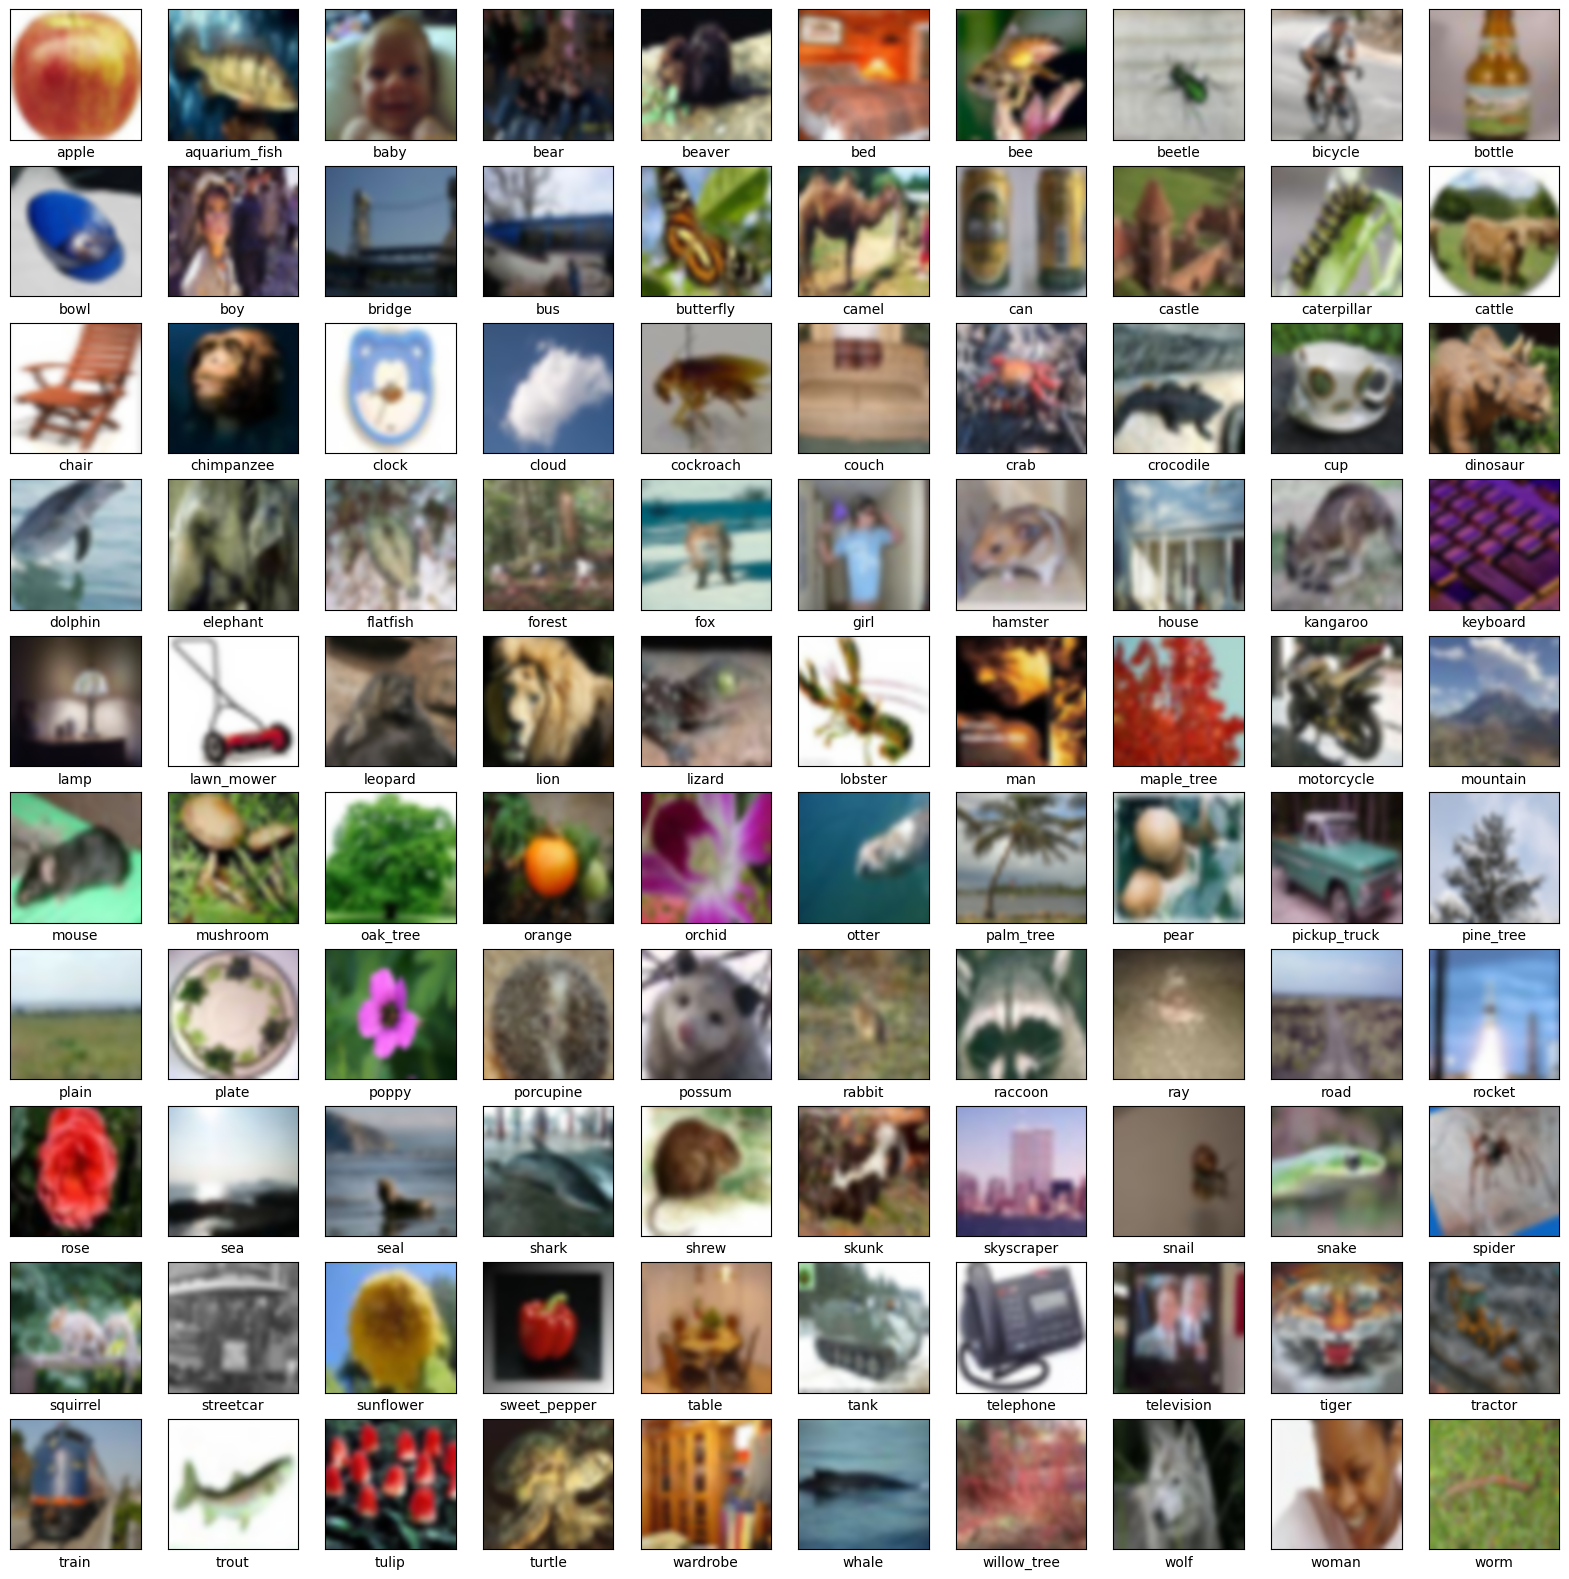

In [9]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total

plt.figure(figsize=(20, 20))
for i in range(100):
    # idx = np.where(train_labels[:, 0] == i)[0][0]

    # Find all indices of the current class label
    indices_of_class = np.where(train_labels[:, 0] == i)[0]
    # Select a random index from these indices
    random_idx = random.choice(indices_of_class)

    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[random_idx], cmap=plt.cm.binary, interpolation='bicubic')
    plt.xlabel(fine_labels[i])
plt.show()

## CNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
*   Print the DL model summary

In [12]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')

from tensorflow.keras import layers, models

def create_cifar100_model():
    model = models.Sequential([
        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Dense layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(100, activation='softmax')  # Output layer with 100 classes for CIFAR-100
    ])

    model.compile(
        optimizer='adam',  # Changed from 'SGD' to 'adam' for better performance
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create the CNN model for CIFAR-100
cifar100_model = create_cifar100_model()

In [13]:
# Print the DL model summary

cifar100_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 128)        

## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training CIFAR-100 data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase


In [14]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"
from tensorflow.keras.callbacks import ModelCheckpoint
import os

checkpoint_path = "/content/drive/My Drive/Colab Notebooks/cifar/cifar100_checkpoint.ckpt"

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)

In [16]:
# Train/fit the DL model using the training CIFAR-100 data
history = cifar100_model.fit(train_images, train_labels,
                             epochs=10,
                             batch_size=32,
                             callbacks=[cp_callback])


Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 2.7199 - accuracy: 0.3165
Epoch 1: saving model to /content/drive/My Drive/Colab Notebooks/cifar/cifar100_checkpoint.ckpt
1563/1563 [==============================] - 125s 80ms/step - loss: 2.7199 - accuracy: 0.3165
Epoch 2/10
1562/1563 [============================>.] - ETA: 0s - loss: 2.4040 - accuracy: 0.3805
Epoch 2: saving model to /content/drive/My Drive/Colab Notebooks/cifar/cifar100_checkpoint.ckpt
1563/1563 [==============================] - 124s 79ms/step - loss: 2.4039 - accuracy: 0.3806
Epoch 3/10
1562/1563 [============================>.] - ETA: 0s - loss: 2.1724 - accuracy: 0.4294
Epoch 3: saving model to /content/drive/My Drive/Colab Notebooks/cifar/cifar100_checkpoint.ckpt
1563/1563 [==============================] - 125s 80ms/step - loss: 2.1722 - accuracy: 0.4295
Epoch 4/10
1563/1563 [==============================] - ETA: 0s - loss: 1.9890 - accuracy: 0.4677
Epoch 4: saving model to /content/driv

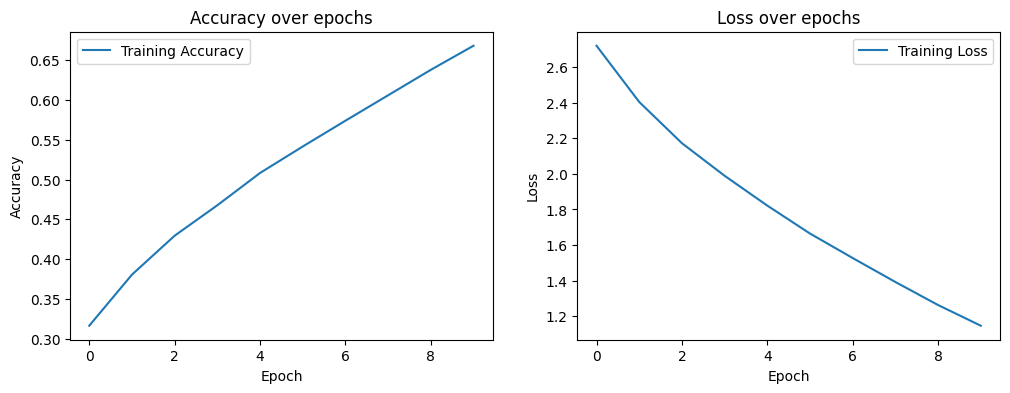

In [17]:
# Plot the training accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/cifar/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the CIFAR-100 test dataset. Accuracy value should be printed. Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model.

In [18]:
# Re-initialize the model
cifar100_model = create_cifar100_model()

In [19]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"
weights_path = "/content/drive/My Drive/Colab Notebooks/cifar/cifar100_checkpoint.ckpt"

cifar100_model.load_weights(weights_path)

In [20]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
loss, accuracy = cifar100_model.evaluate(test_images, test_labels, verbose=2)
print(f"Restored model, test accuracy: {accuracy*100:.2f}%")


313/313 - 6s - loss: 2.7866 - accuracy: 0.3950 - 6s/epoch - 21ms/step
Restored model, test accuracy: 39.50%


# Natural Language Processing - RNN

The goal of this task is to get hands-on experience in developing, training and testing **Recurrent Neural Network** for the Natural Language Processing task of Sentiment Analysis / Text Classification. In this part, you will work with the well-known **Reuters newswire classification dataset**. The dataset consists of newswires from Reuters, labeled over 46 topics. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) or [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.


## Load/Prepare Data

(15 points)

In this section, you will write code for the following:

*   Load the Reuters dataset - use the Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   Prepare the data to be used for the next steps
 *   Each data entry (newswire) can be of different lengths
 *   Make each newswire consistent - same number of words
 *   'Pad' words (say 0) to get to the standard length or remove words

In [21]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

vocabulary_size = 10000

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=vocabulary_size)
max_length = max([len(x) for x in np.concatenate((x_train, x_test), axis=0)])

2110848/2110848 [==============================] - 0s 0us/step


In [22]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words
x_train_padded = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test_padded = pad_sequences(x_test, maxlen=max_length, padding='post')

print(f"Training input shape: {x_train_padded.shape}")
print(f"Testing input shape: {x_test_padded.shape}")


Training input shape: (8982, 2376)
Testing input shape: (2246, 2376)


## RNN Model Creation

(15 points)

In this section, you will write code for the following:

*   Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
*   Print the DL model summary

In [23]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Model parameters
embedding_dim = 128
lstm_units = 100
max_length = max_length  # Ensuring this is the same max_length from the data preparation step
num_classes = 46  # Reuters dataset has 46 different classes

# Create a DL model for Natural Language Processing - Recurrent Neural Network
model = Sequential([
    Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(units=lstm_units, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Print the DL model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2376, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dense_6 (Dense)             (None, 64)                6464      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 46)                2990      
                                                                 
Total params: 1381054 (5.27 MB)
Trainable params: 1381054 (5.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training

(15 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training Reuters data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load)), to be used for the testing phase


In [25]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/"
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Define the checkpoint path
checkpoint_path = "/content/drive/My Drive/Colab Notebooks/reuters/reuters_checkpoint.ckpt"

# Create a checkpoint that saves the model's weights
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      save_weights_only=True,
                                      verbose=1,
                                      save_best_only=True)  # Save only the best model

# Early stopping to prevent overfitting
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=5,
                                        restore_best_weights=True)



In [26]:
# Train/fit the DL model using the training Reuters data
history = model.fit(x_train_padded, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.1,  # Use part of the training data for validation
                    callbacks=[checkpoint_callback, early_stopping_callback],
                    verbose=1)


Epoch 1/20
64/64 [==============================] - ETA: 0s - loss: 2.8806 - accuracy: 0.3041
Epoch 1: val_loss improved from inf to 2.48501, saving model to /content/drive/My Drive/Colab Notebooks/reuters/reuters_checkpoint.ckpt
64/64 [==============================] - 538s 8s/step - loss: 2.8806 - accuracy: 0.3041 - val_loss: 2.4850 - val_accuracy: 0.3315
Epoch 2/20
64/64 [==============================] - ETA: 0s - loss: 2.5717 - accuracy: 0.3282
Epoch 2: val_loss improved from 2.48501 to 2.47016, saving model to /content/drive/My Drive/Colab Notebooks/reuters/reuters_checkpoint.ckpt
64/64 [==============================] - 532s 8s/step - loss: 2.5717 - accuracy: 0.3282 - val_loss: 2.4702 - val_accuracy: 0.3315
Epoch 3/20
64/64 [==============================] - ETA: 0s - loss: 2.5200 - accuracy: 0.3334
Epoch 3: val_loss improved from 2.47016 to 2.46523, saving model to /content/drive/My Drive/Colab Notebooks/reuters/reuters_checkpoint.ckpt
64/64 [==============================] - 5

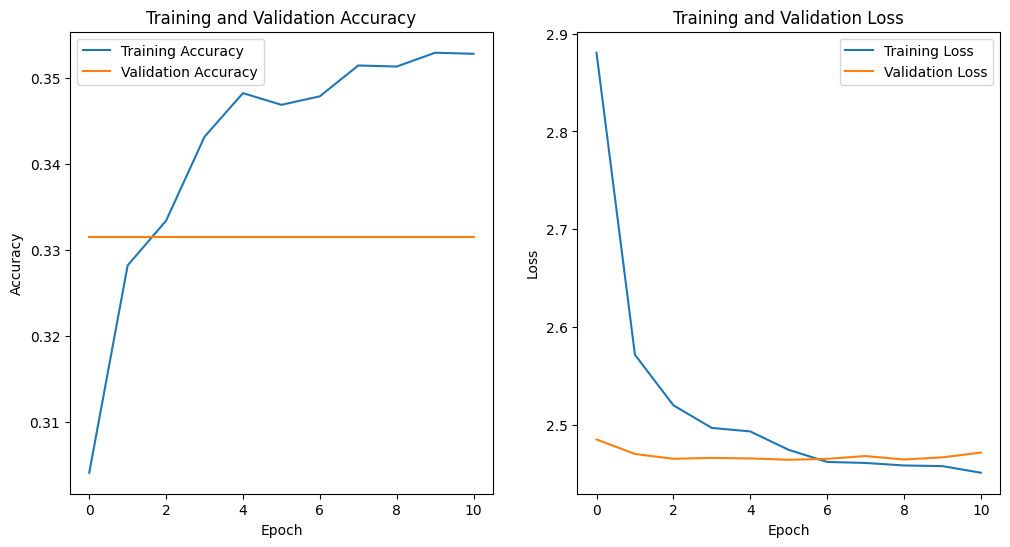

In [27]:
# Plot the training/validation accuracy and loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the Reuters test dataset. Accuracy value should be printed.

This section of the code should be able to run independently from the **training** section, i.e., run this section directly after creating the model.

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Function to create the model architecture
def create_model(vocabulary_size, embedding_dim, max_length, lstm_units, num_classes):
    model = Sequential([
        Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, input_length=max_length),
        LSTM(units=lstm_units),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Parameters
vocabulary_size = 10000
embedding_dim = 128
lstm_units = 100
max_length = 2376  # Make sure this matches the max_length used in training
num_classes = 46

# Re-initialize the model
model = create_model(vocabulary_size, embedding_dim, max_length, lstm_units, num_classes)

In [30]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"
weights_path = "/content/drive/My Drive/Colab Notebooks/reuters/reuters_checkpoint.ckpt"
model.load_weights(weights_path)

# Compile the model to prepare for evaluation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Evaluate the trained DL model on the Reuters test dataset
loss, accuracy = model.evaluate(x_test_padded, y_test, verbose=2)
print(f"Test accuracy: {accuracy*100:.2f}%")

71/71 - 56s - loss: 2.4153 - accuracy: 0.3620 - 56s/epoch - 782ms/step
Test accuracy: 36.20%


# Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Download and zip the folders "/content/drive/My Drive/Colab Notebooks/cifar/" (abc123_cifar_model.zip) and "/content/drive/My Drive/Colab Notebooks/reuters/" (abc123_reuters_model.zip)
4.   Upload the .ipynb file and .zip on Blackboard



## Rubric

*   Computer Vision - CNN
    *   (20 points) Load/Prepare Data
    *   (15 points) CNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation
*   Natural Language Processing - RNN
    *   (15 points) Load/Prepare Data
    *   (15 points) RNN Model Creation
    *   (15 points) Training
    *   (15 points) Testing/Evaluation

